In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('games.csv')

In [5]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


(0.0, 200.0)

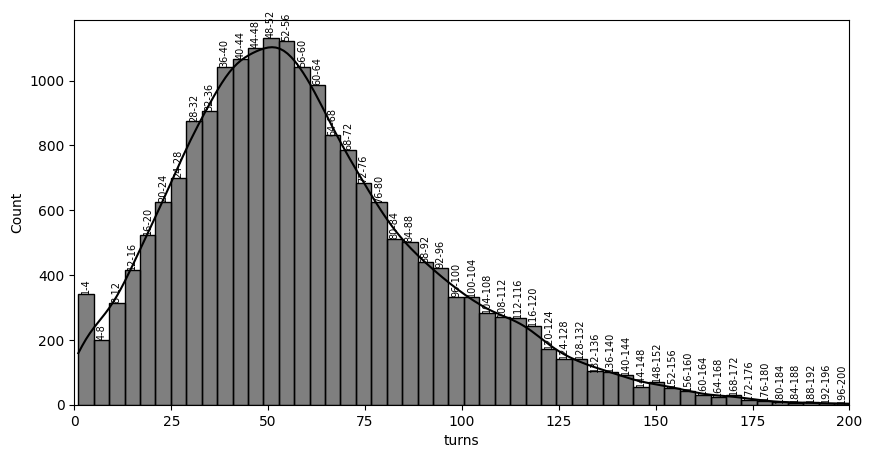

In [7]:
# Filter the dataframe to include only rows where 'turns' is between 0 and 200
df_filtered = df[(df['turns'] >= 0) & (df['turns'] <= 200)]
# Now plot the histogram with the filtered dataframe
plt.figure(figsize=(10,5))
counts, bin_edges = np.histogram(df_filtered['turns'], bins=50)
ax = sns.histplot(df_filtered['turns'], bins=50, kde=True, color='Black', stat='count')

# Add labels to each bin
for i in range(len(bin_edges)-1):
    bin_center = (bin_edges[i] + bin_edges[i+1]) / 2
    label = f"{int(bin_edges[i])}-{int(bin_edges[i+1])}"
    ax.text(bin_center, counts[i], label, rotation=90, ha='center', va='bottom', fontsize=7)

# Set x-axis range to 0-200
plt.xlim(0, 200)

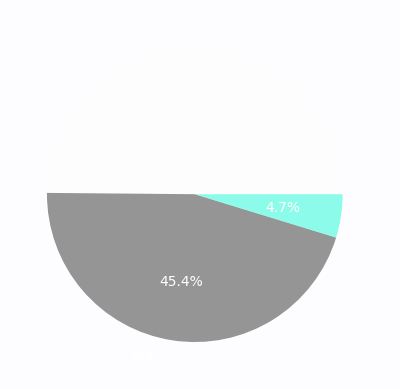

In [8]:
winner_counts = df['winner'].value_counts()
colors1 = ["#fdfdfd8d","#0e0e0e6f","#6AFCE3C1"]
fig = plt.gcf()
fig.set_facecolor("#f0f3ff18")
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%', colors=colors1, textprops={'color':'white'})
plt.show()

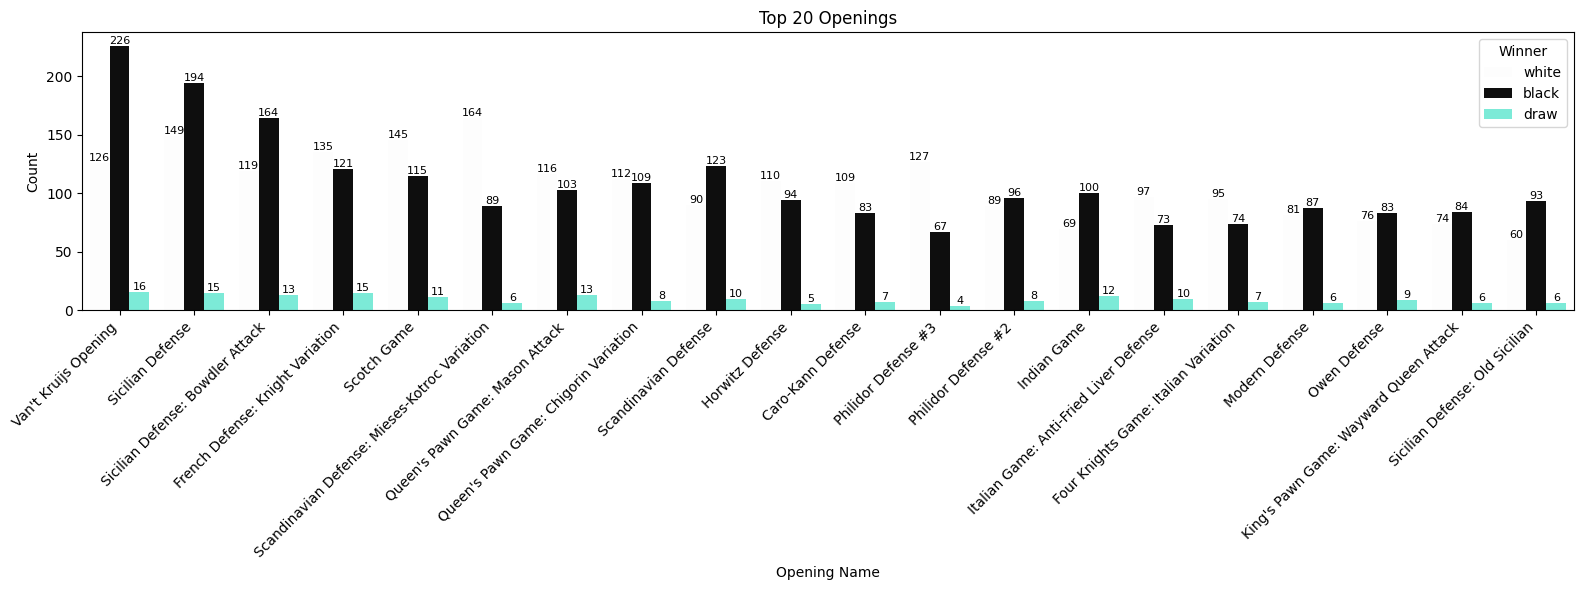

In [9]:
winner_counts = df['winner'].value_counts()

# Plot the count of winners for each opening
plt.figure(figsize=(16, 6))
axe = sns.countplot(x='opening_name', hue='winner', data=df, order=df['opening_name'].value_counts().index[:20], palette=colors1)
for container in axe.containers:
	axe.bar_label(container, fontsize=8)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Openings')
plt.xlabel('Opening Name')
plt.ylabel('Count')
plt.legend(title='Winner')
plt.tight_layout()
plt.show()

C:\Users\shahr\AppData\Local\Temp\ipykernel_7752\3763817216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='victory_status', data=df, palette=colors)


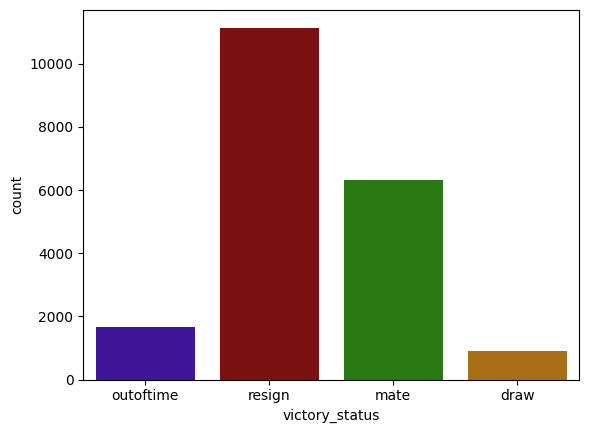

In [10]:
colors = ["#3400acc0","#8b0000b8", "#208b00b8", "#C07300C1"]
sns.countplot(x='victory_status', data=df, palette=colors)
plt.show()

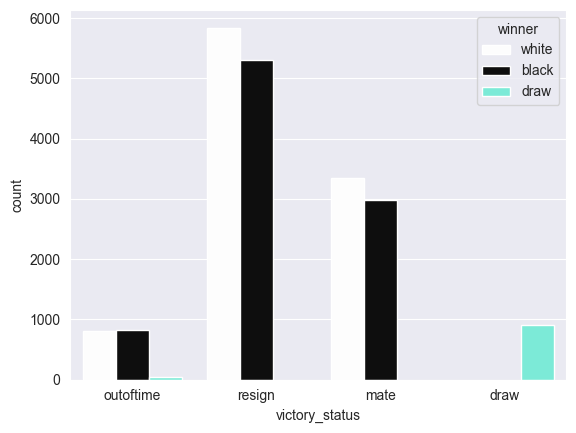

In [11]:
colors1 = ["#fdfdfd8d","#0e0e0e6f","#6AFCE3C1"]
sns.set_style("darkgrid")
sns.countplot(x='victory_status',hue='winner', data=df, palette=colors1)
plt.show()

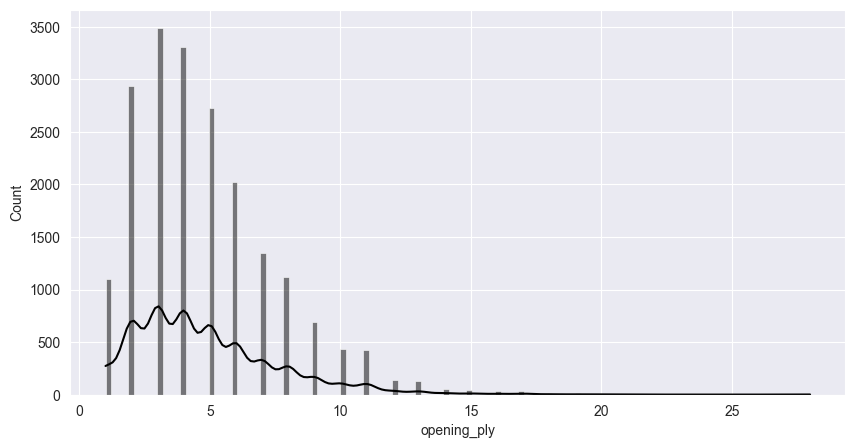

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(x=df['opening_ply'], kde=True, color='Black')
plt.show()

In [13]:
df['winner_id'] = np.where(df['winner'] == 'black', df['black_id'], df['white_id'])
df['loser_id'] = np.where(df['winner'] == 'white', df['black_id'], df['white_id'])
df['winner_rating'] = np.where(df['winner'] == 'black', df['black_rating'], df['white_rating'])
df['loser_rating'] = np.where(df['winner'] == 'white', df['black_rating'], df['white_rating'])

In [14]:
df['better_won'].value_counts()

KeyError: 'better_won'

C:\Users\shahr\AppData\Local\Temp\ipykernel_7752\680221321.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axe = sns.countplot(x='better_won', data=df , palette=colors1)


Text(0.5, 1.0, 'Did the player with the higher rating win?')

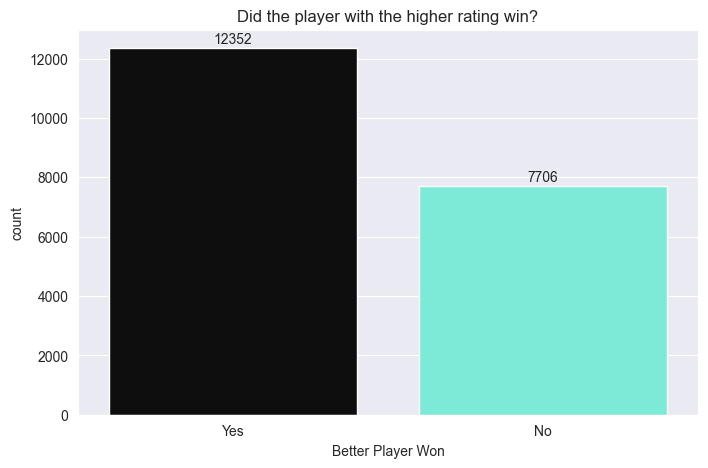

In [15]:
colors1 = ["#0e0e0e6f","#6AFCE3C1"]
df['better_won'] =np.where(df['winner_rating'] > df['loser_rating'], True, False)
df['better_won'] = df['better_won'].replace({True: 'Yes', False: 'No'})
plt.figure(figsize=(8, 5))
axe = sns.countplot(x='better_won', data=df , palette=colors1)
for i, v in enumerate(df['better_won'].value_counts()):
    axe.text(i, v + 50 , str(v), ha='center', va='bottom', fontsize=10)
plt.xlabel('Better Player Won')
plt.title('Did the player with the higher rating win?')

In [ ]:
df['winner_id'].value_counts()

winner_id
taranga               73
chess-brahs           57
a_p_t_e_m_u_u         51
vladimir-kramnik-1    50
chesscarl             45
                      ..
ejachess               1
bidjack                1
soultego               1
capa_jr                1
trelynn17              1
Name: count, Length: 9209, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_10664\1638965223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axe = sns.barplot(x= best_players.index ,y=best_players.values, palette=colors1)
C:\Users\user\AppData\Local\Temp\ipykernel_10664\1638965223.py:3: UserWarning: 
The palette list has fewer values (2) than needed (20) and will cycle, which may produce an uninterpretable plot.
  axe = sns.barplot(x= best_players.index ,y=best_players.values, palette=colors1)


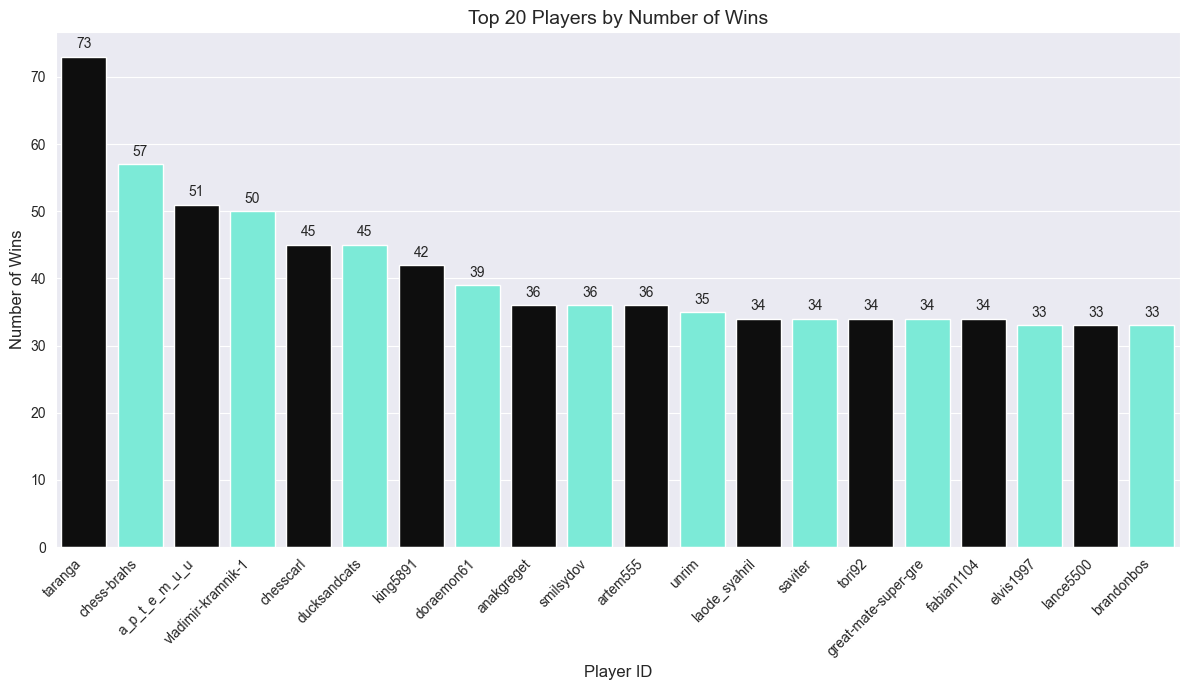

In [ ]:
plt.figure(figsize=(12, 7))
best_players = df['winner_id'].value_counts().head(20)
axe = sns.barplot(x= best_players.index ,y=best_players.values, palette=colors1)
for i, v in enumerate(best_players.values):
    axe.text(i, v+0.8, str(v), ha='center', va='bottom', fontsize=10)
plt.xlabel('Player ID', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.title('Top 20 Players by Number of Wins', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
print("Maximum rating in the dataset:", max(df['white_rating'].max(), df['black_rating'].max()))
print("Minimum rating in the dataset:", min(df['white_rating'].min(), df['black_rating'].min()))
print("Mean rating in the dataset: {:.2f}".format((df['white_rating'].mean() + df['black_rating'].mean()) / 2))

Maximum rating in the dataset: 2723
Minimum rating in the dataset: 784
Mean rating in the dataset: 1592.73


## Data Analysis Completed Successfully!